# Importing libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 

# Task A: Regression analysis and Monte Carlo

𝑌𝑖 = 𝛽0 + 𝛽1𝑋1,𝑖 + 𝛽2𝑋2,𝑖 + β3𝑋3,𝑖 + 𝛽4𝑋2 3,𝑖 + 𝜀𝑖

Define the notation:

Y — dependent variable

X — independent variable(s)

β — OLS coefficient(s)

ϵ — error term

In [48]:
randomX = pd.read_csv('randomX.csv')

In [49]:
randomX.head(4)

,x1,x2,x3
0,0.537667,0.840376,0.183227
1,1.833885,-0.888032,-1.029768
2,-2.258847,0.100093,0.949222
3,0.862173,-0.544529,0.307062


Simulate 2000 MC samples of y

In [50]:
# Simulate 2000 MC samples of y
n = 2000
x1 = randomX.x1
y = np.zeros(n)
b_0 = 0.5
b_1 = 1.5 

y = b_0 + b_1 * x1 + np.random.normal(n,0,1)

In [51]:
y1 = pd.DataFrame({'y':y})
randomX_df = pd.concat([randomX, y1], axis=1)

In [52]:
randomX_df.head()

,x1,x2,x3,y
0,0.537667,0.840376,0.183227,2001.306501
1,1.833885,-0.888032,-1.029768,2003.250828
2,-2.258847,0.100093,0.949222,1997.111730
3,0.862173,-0.544529,0.307062,2001.793260
4,0.318765,0.303521,0.135175,2000.978148


In [53]:
# To estimate the constant term β0, we need to add a column of 1’s to our dataset (consider the equation if β0 was replaced with β0xi and xi=1)
randomX_df['const'] = 1

In [54]:
# OLS function
reg = sm.OLS(endog=randomX_df['y'], exog=randomX_df[['const','x1','x2','x3']], missing='drop')
type(reg)

statsmodels.regression.linear_model.OLS

In [55]:
results = reg.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [56]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.136e+27
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:23:28   Log-Likelihood:                 2744.6
No. Observations:                 100   AIC:                            -5481.
Df Residuals:                      96   BIC:                            -5471.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2000.5000   3.03e-14   6.61e+16      0.0

In [57]:
print('Parameters: ', results.params)
print('R squared: ', results.rsquared)

Parameters:  const    2.000500e+03
x1       1.500000e+00
x2       1.989520e-13
x3      -7.815970e-14
dtype: float64
R squared:  1.0


i. Plot a histogram for each of the estimated parameters

In [58]:
def plot_hist(x):
    result = plt.hist(x, bins=20, color='c', edgecolor='k', alpha=0.65)
    plt.axvline(x.median(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(x.median()*1.1, max_ylim*0.9, 'median: {:.2f}'.format(x.median()))

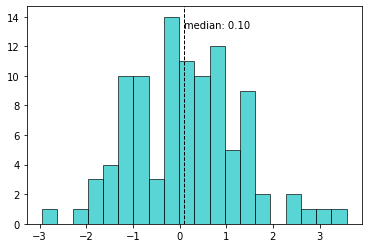

In [59]:
plot_hist(randomX_df['x1'])

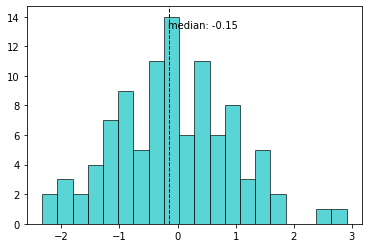

In [60]:
plot_hist(randomX_df['x2'])

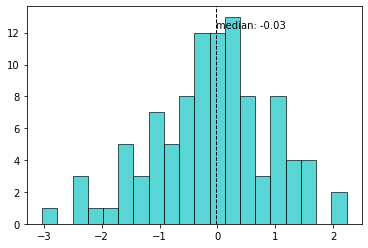

In [61]:
plot_hist(randomX_df['x3'])

iii.  Construct 95% confidence intervals for each parameter based on the 
simulations

In [62]:
#Confidence Intervals Using the Normal Distribution

import scipy.stats as st

def conf_interval(x):
    intv = st.norm.interval(alpha=0.95, loc=np.mean(x), scale=st.sem(x))
    print('95% confidence interval =',intv)

In [63]:
# Confidence Intervals x1
conf_interval(randomX_df['x1'])

95% confidence interval = (-0.10474066494349593, 0.35091133994550744)


In [64]:
# Confidence Intervals x2
conf_interval(randomX_df['x2'])

95% confidence interval = (-0.26966791217101027, 0.12430499559860596)


In [65]:
# Confidence Intervals x3
conf_interval(randomX_df['x3'])

95% confidence interval = (-0.3099873779304663, 0.08840076985791712)


iv.  Explain in which context it would be useful to replace the OLS estimator used 
above with a logistic regression

Linear regression gives a continuous output, but Logistic regression is a statistical method for predicting binary classes. An example of the continuous output is house price and stock price. Example's of the discrete output is predicting whether a patient has cancer or not, predicting whether the customer will churn. Linear regression is estimated using Ordinary Least Squares (OLS) while logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach.

In the context above we have to replace the y samples with binary classes in order for it to be used for Logistic regression.

v. Interpretation of β2 β3 β4

The intepretation of b2 is 1.500000e+00

The intepretation of b3 is -1.350031e-13

The intepretation of b4 is 2.842171e-14

# Task B: Time series

In [66]:
from pandas.plotting import lag_plot

In [67]:
varekonsum_df = pd.read_excel('varekonsum.xlsx', usecols='C:IT' ,header=3).T
varekonsum_df = varekonsum_df.dropna(axis=1)

#Adjust column label
varekonsum_df.columns = ['varekonsum']

varekonsum_df.index = pd.date_range(start='31/01/2000', end='31/12/2020', freq='M')

In [68]:
varekonsum_df.sample(8)

,varekonsum
2011-11-30,123.4
2012-09-30,118.2
2005-01-31,90.9
2013-01-31,119.9
2009-05-31,110.7
2013-12-31,150.4
2012-05-31,123.7
2016-03-31,122.7


ii. Construct a dummy variable which has zeros for each month in the sample, 
but a one for each December month. Call this variable “dum”

In [69]:
varekonsum_df['dum'] = [1 if x == 12 else 0 for x in varekonsum_df.index.month]

In [70]:
varekonsum_df[varekonsum_df.index.month == 12].head()

,varekonsum,dum
2000-12-31,101.0,1
2001-12-31,105.7,1
2002-12-31,109.7,1
2003-12-31,116.3,1
2004-12-31,123.7,1


 iii. Run the following OLS regression: 𝑌𝑡 = β0 + β1𝑡 + β2𝑑𝑢𝑚 + ε𝑡

In [71]:
X = varekonsum_df['dum']
y = varekonsum_df['varekonsum']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             varekonsum   R-squared (uncentered):                   0.125
Model:                            OLS   Adj. R-squared (uncentered):              0.121
Method:                 Least Squares   F-statistic:                              35.72
Date:                Wed, 17 Mar 2021   Prob (F-statistic):                    7.79e-09
Time:                        11:23:31   Log-Likelihood:                         -1537.5
No. Observations:                 252   AIC:                                      3077.
Df Residuals:                     251   BIC:                                      3081.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

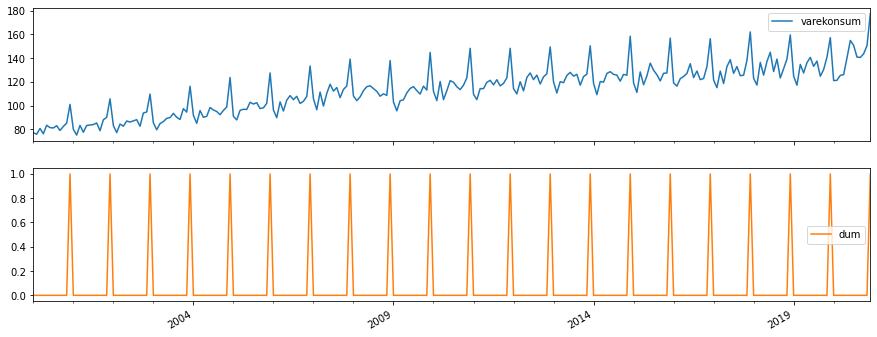

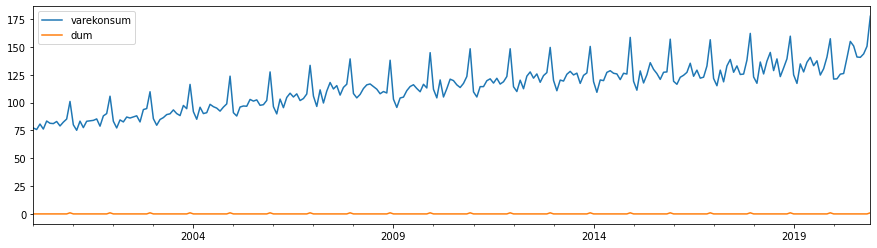

In [72]:
varekonsum_df.plot(subplots=True, figsize=(15,6))
varekonsum_df.plot(y=["varekonsum", "dum"], figsize=(15,4))

# Task C : Regularization and dimension reduction

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [74]:
financial_data = pd.read_csv('2018_Financial_Data.csv')

In [75]:
financial_data = financial_data.set_index('Unnamed: 0')

financial_data['Sector'] = financial_data['Sector'].astype('category')
financial_data['Sector'] = financial_data['Sector'].cat.codes

In [76]:
financial_data = financial_data.fillna(0)

In [77]:
financial_data.isnull().sum().sum()

0

In [78]:
financial_data.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,2,32.794573,1
KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,4,40.588068,1
INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,9,30.295514,1
MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,9,64.213737,1
GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,7,44.757840,1


i. . Explain why estimating a OLS regression will fail in this case?

Estimating a OLS regression will fail in this case because it performs subpar when some points in the training data have excessively large or small values for the dependent variable compared to the rest of the training data. The reason for this is that since the least squares method is concerned with minimizing the sum of the squared error, any training point that has a dependent value that differs a lot from the rest of the data will have a disproportionately large effect on the resulting constants that are being solved for. And also there are too many variables in this dataset.

In [79]:
# Define Independent and dependent dataset
X = financial_data.drop(['Dividend payments'], axis=1)
y = financial_data['Dividend payments']

In [80]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(3074, 223)
(1318, 223)


ii.  Run a LASSO regression where you choose the penalization parameter using 
5-fold cross validation.

In [81]:
lasso = Lasso()

parameters = {'alpha': [1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X_train, y_train)

/Users/mariusringstad/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.170429896791632e+19, tolerance: 1.4897894662060128e+17
  model = cd_fast.enet_coordinate_descent(
/Users/mariusringstad/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.231136438892826e+19, tolerance: 1.9050175777383683e+17
  model = cd_fast.enet_coordinate_descent(
/Users/mariusringstad/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.720356925701669e+19, tolerance: 1.5652946814967136e+17
  model = cd_fast.enet_coordinate_descent(
/Users/mariusringst

/Users/mariusringstad/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.231137429576647e+19, tolerance: 1.9050175777383683e+17
  model = cd_fast.enet_coordinate_descent(
/Users/mariusringstad/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.720357782991441e+19, tolerance: 1.5652946814967136e+17
  model = cd_fast.enet_coordinate_descent(
/Users/mariusringstad/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.32473461503029e+19, tolerance: 1.7997661790703315e+17
  model = cd_fast.enet_coordinate_descent(
/Users/mariusringsta

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

For this lasso regression, we are using GridSearchCV. This will allow us to automatically perform 5-fold cross-validation with a range of different regularization parameters in order to find the optimal value of alpha.

In [82]:
lasso_regressor.best_params_

{'alpha': 20}

In [83]:
lasso_regressor.best_score_

-1.492546989369424e+25

In [84]:
lasso_regressor.score(X_test, y_test)

-3.8126256210385714e+23

In this case, the optimal value for alpha is 20, the negative MSE is -1.4925 and the R squared is -3.8126 on the test set

iii. Explain shortly why cross validation is used in C.ii. Explain shortly why cross validation, and out-of-sample testing in general, is used to avoid in-sample over-fitting.


Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This problem can be rectified using resampling methods, which repeats a calculation multiple times using randomly selected subsets of the complete data. To avoid this we can use k-fold cross-validation.

In k-fold cross-validation, the data is divided into k folds. The model is trained on k-1 folds with one fold held back for testing. This process gets repeated to ensure each fold of the dataset gets the chance to be the held back set. Once the process is completed, we can summarize the evaluation metric using the mean or/and the standard deviation.

v. Use all predictors and compute 1 common component using PCA. Plot this 
common component. 

In [85]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (4392, 223)
transformed shape: (4392, 1)


In [86]:
lasso = Lasso()

lasso.fit(X_pca,y)

/Users/mariusringstad/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5973369606449296e+21, tolerance: 3.201220721375451e+17
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [87]:
lasso.score(X_pca,y)

0.0009992807037743079